In [1]:
# 拉格朗日插值法
import numpy as np




def h(x,y,a):
    s=0.0
    for i in range(len(y)):
        t=y[i]
        for j in range(len(y)):
            if i !=j:
                t*=(a-x[j])/(x[i]-x[j])
        s +=t
    return s

x=[1,2]; y=[2,4]
print(h(x,y,1.5))

3.0


In [2]:

%%writefile 插值拟合/newton.py
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 17 18:34:21 2016

@author: tete
@brief: 牛顿插值法
"""


import matplotlib.pyplot as plt

"""
@brief:   计算n阶差商 f[x0, x1, x2 ... xn]
@param:   xi   所有插值节点的横坐标集合                                                        o
@param:   fi   所有插值节点的纵坐标集合                                                      /   \
@return:  返回xi的i阶差商(i为xi长度减1)                                                     o     o
@notice:    a. 必须确保xi与fi长度相等                                                        / \   / \
            b. 由于用到了递归，所以留意不要爆栈了.                                           o   o o   o
            c. 递归减递归(每层递归包含两个递归函数), 每层递归次数呈二次幂增长，总次数是一个满二叉树的所有节点数量(所以极易栈溢出)                                                                                    
"""
def diff_quo(xi = [], fi = []):
    if len(xi) > 2 and len(fi) > 2:
        return (diff_quo(xi[:len(xi) - 1], fi[:len(fi) - 1]) - diff_quo(xi[1:len(xi)], fi[1:len(fi)])) / float(xi[0] - xi[-1])
    return (fi[0] - fi[1]) / float(xi[0] - xi[1])




"""
@brief:     获得Wi(x)函数;
            Wi的含义举例 W1 = (x - x0); W2 = (x - x0)(x - x1); W3 = (x - x0)(x - x1)(x - x2)
@param:  i  i阶(i次多项式)
@param:  xi  所有插值节点的横坐标集合
@return: 返回Wi(x)函数
"""
def get_Wi(i = 0, xi = []):
    def Wi(x):
        result = 1.0
        for each in range(i):
            result *= (x - xi[each])
        return result
    return Wi




"""
@brief: 获得牛顿插值函数
@
"""
def get_Newton_inter(xi = [], fi = []):
    def Newton_inter(x):
        result = fi[0]
        for i in range(2, len(xi)):
            result += (diff_quo(xi[:i], fi[:i]) * get_Wi(i-1, xi)(x))
        return result
    return Newton_inter



"""
demo:
"""
if __name__ == '__main__':

    ''' 插值节点, 这里用二次函数生成插值节点，每两个节点x轴距离位10 '''
    sr_x = [i for i in range(-50, 51, 10)]
    sr_fx = [i**2 for i in sr_x] 

    Nx = get_Newton_inter(sr_x, sr_fx)            # 获得插值函数

    tmp_x = [i for i in range(-50, 51)]          # 测试用例
    tmp_y = [Nx(i) for i in tmp_x]               # 根据插值函数获得测试用例的纵坐标

    ''' 画图 '''
    plt.figure("I love china")
    ax1 = plt.subplot(111)
    plt.sca(ax1)
    plt.plot(sr_x, sr_fx, linestyle = '', marker='o', color='b')
    plt.plot(tmp_x, tmp_y, linestyle = '--', color='r')
    plt.show()


Writing 插值拟合/newton.py


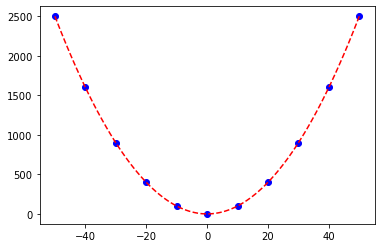

In [4]:
%run ./插值拟合/newton.py

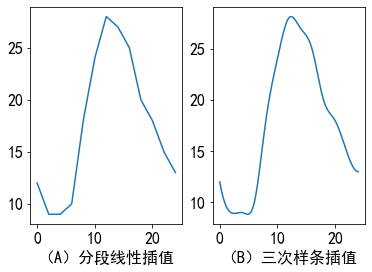

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d



x=np.arange(0,25,2)
y=np.array([12, 9, 9, 10, 18, 24, 28, 27, 25, 20, 18, 15, 13])
xnew=np.linspace(0, 24, 500)  #插值点
f1=interp1d(x, y); y1=f1(xnew);
f2=interp1d(x, y,'cubic'); y2=f2(xnew)
plt.rc('font',size=16); plt.rc('font',family='SimHei')
plt.subplot(121), plt.plot(xnew, y1); plt.xlabel("（A）分段线性插值")
plt.subplot(122); plt.plot(xnew, y2); plt.xlabel("（B）三次样条插值")
plt.savefig("./插值拟合/figure7_4.png", dpi=500); plt.show()

区域的面积为： 4782737.815311186


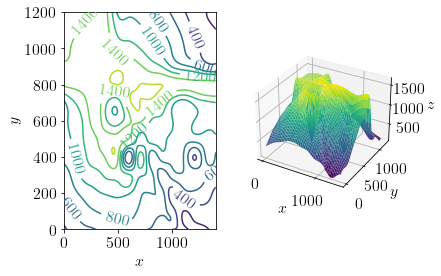

In [6]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.interpolate import interp2d



z=np.loadtxt("./数据集/Pdata7_5.txt")  #加载高程数据
x=np.arange(0,1500,100)
y=np.arange(1200,-100,-100)
f=interp2d(x, y, z, 'cubic')
xn=np.linspace(0,1400,141)
yn=np.linspace(0,1200,121)
zn=f(xn, yn)

m=len(xn); n=len(yn); s=0; 
for i in np.arange(m-1):
    for j in np.arange(n-1):
        p1=np.array([xn[i],yn[j],zn[j,i]])
        p2=np.array([xn[i+1],yn[j],zn[j,i+1]])
        p3=np.array([xn[i+1],yn[j+1],zn[j+1,i+1]])
        p4=np.array([xn[i],yn[j+1],zn[j+1,i]])
        p12=norm(p1-p2); p23=norm(p3-p2); p13=norm(p3-p1);
        p14=norm(p4-p1); p34=norm(p4-p3);
        L1=(p12+p23+p13)/2;s1=np.sqrt(L1*(L1-p12)*(L1-p23)*(L1-p13));
        L2=(p13+p14+p34)/2; s2=np.sqrt(L2*(L2-p13)*(L2-p14)*(L2-p34));
        s=s+s1+s2;
print("区域的面积为：", s)

plt.rc('font',size=16); plt.rc('text',usetex=True)
plt.subplot(121); contr=plt.contour(xn,yn,zn); plt.clabel(contr)
plt.xlabel('$x$'); plt.ylabel('$y$',rotation=90)
ax=plt.subplot(122,projection='3d'); 
X,Y=np.meshgrid(xn,yn)
ax.plot_surface(X, Y, zn,cmap='viridis')
ax.set_xlabel('$x$'); ax.set_ylabel('$y$'); ax.set_zlabel('$z$')
plt.savefig('./插值拟合/figure7_5.png',dpi=500); plt.show()

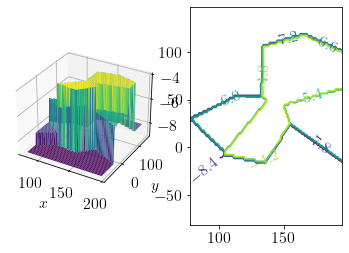

In [7]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata




x=np.array([129,140,103.5,88,185.5,195,105,157.5,107.5,77,81,162,162,117.5])
y=np.array([7.5,141.5,23,147,22.5,137.5,85.5,-6.5,-81,3,56.5,-66.5,84,-33.5])
z=-np.array([4,8,6,8,6,8,8,9,9,8,8,9,4,9])
xy=np.vstack([x,y]).T
xn=np.linspace(x.min(), x.max(), 100)
yn=np.linspace(y.min(), y.max(), 100)
xng, yng = np.meshgrid(xn,yn)  #构造网格节点
zn=griddata(xy, z, (xng, yng), method='nearest')  #最近邻点插值
plt.rc('font',size=16); plt.rc('text',usetex=True)
ax=plt.subplot(121,projection='3d'); 
ax.plot_surface(xng, yng, zn,cmap='viridis')
ax.set_xlabel('$x$'); ax.set_ylabel('$y$'); ax.set_zlabel('$z$')
plt.subplot(122); c=plt.contour(xn,yn,zn,8); plt.clabel(c)
plt.savefig('./插值拟合/figure7_6.png',dpi=500); plt.show()

拟合二次多项式的从高次幂到低次幂系数分别为: [-9.81083916 20.12929371 -0.03167133]
预测值分别为： [4.38747465 5.81175367]


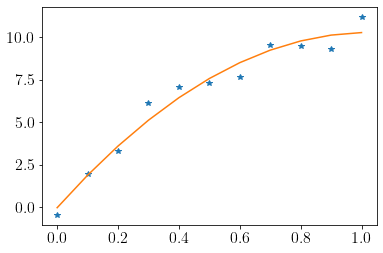

In [8]:
from numpy import polyfit, polyval, array, arange
from matplotlib.pyplot import plot,show,rc



x0=arange(0, 1.1, 0.1)
y0=array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
p=polyfit(x0, y0, 2) #拟合二次多项式
print("拟合二次多项式的从高次幂到低次幂系数分别为:",p)
yhat=polyval(p,[0.25, 0.35]); print("预测值分别为：", yhat)
rc('font',size=16)
plot(x0, y0, '*', x0, polyval(p, x0), '-'); show()

In [9]:
import numpy as np
from scipy.optimize import curve_fit



y=lambda x, a, b, c: a*x**2+b*x+c
x0=np.arange(0, 1.1, 0.1)
y0=np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
popt, pcov=curve_fit(y, x0, y0)
print("拟合的参数值为：", popt)
print("预测值分别为：", y(np.array([0.25, 0.35]), *popt))

拟合的参数值为： [-9.81083901 20.12929291 -0.03167108]
预测值分别为： [4.38747471 5.81175366]


In [10]:
import numpy as np
from scipy.optimize import curve_fit




x0=np.array([6, 2, 6, 7, 4, 2, 5, 9])
y0=np.array([4, 9, 5, 3, 8, 5, 8, 2])
z0=np.array([5, 2, 1, 9, 7, 4, 3, 3])
xy0=np.vstack((x0, y0))


def Pfun(t, a, b, c):
    return a*np.exp(b*t[0])+c*t[1]**2


popt, pcov=curve_fit(Pfun, xy0, z0)
print("a，b，c的拟合值为：", popt)

a，b，c的拟合值为： [ 5.08907305e+00 -2.58248004e-03 -2.14509683e-02]


三个参数的拟合值分别为： [0.99143957 1.99572979 3.00035893]


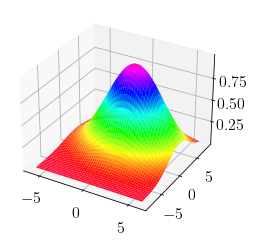

In [11]:
from mpl_toolkits import mplot3d
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt




m=200; n=300
x=np.linspace(-6, 6, m); y=np.linspace(-8, 8, n);
x2, y2 = np.meshgrid(x, y)
x3=np.reshape(x2,(1,-1)); y3=np.reshape(y2, (1,-1))
xy=np.vstack((x3,y3))


def Pfun(t, m1, m2, s):
    return np.exp(-((t[0]-m1)**2+(t[1]-m2)**2)/(2*s**2))


z=Pfun(xy, 1, 2, 3); zr=z+0.2*np.random.normal(size=z.shape) #噪声数据
popt, pcov=curve_fit(Pfun, xy, zr)   #拟合参数
print("三个参数的拟合值分别为：",popt)
zn=Pfun(xy, *popt)  #计算拟合函数的值
zn2=np.reshape(zn, x2.shape)
plt.rc('font',size=16)
ax=plt.axes(projection='3d') #创建一个三维坐标轴对象
ax.plot_surface(x2, y2, zn2,cmap='gist_rainbow')
plt.savefig("./插值拟合/figure7_10.png", dpi=500); plt.show()

In [14]:
%%writefile ./function/pfun_7_1.py
def w(x, y, i, x0):
    p=1.0
    for j in range(len(x)):
        if j==i:
            continue
        p *= (x0-x[j]); p /= (x[i]-x[j])
    return p

def Lag_intp(x, y, x0):
    s=0
    for i in range(len(i)):
        s += w(x, y, i, x0)
    return s

Writing ./function/pfun_7_1.py


In [15]:
%%writefile function/pfun_7_2.py
def diff_forward(f, k, h, x):
    if k<=0:
        return f(x)
    else:
        return diff_forward(f, k-1, h, x+h) - diff_forward(f, k-1, h, x)

Writing function/pfun_7_2.py


In [16]:
%%writefile function/pfun_7_3.py
"""计算n阶差商 f[x0, x1, x2 ... xn]
输入参数：xi为所有插值节点的数组
输入参数：fi为所有插值节点函数值的数组
返回值:  返回xi的i阶差商(i为xi长度减1)"""
def diff_quo(xi=[], fi=[]):
    if len(xi)>2 and len(fi)>2:
        return (diff_quo(xi[:len(xi)-1],fi[:len(fi)-1])-diff_quo(xi[1:len(xi)],fi[1:len(fi)]))\
                /float(xi[0]-xi[-1])  #续行

    return (fi[0]- fi[1])/float(xi[0]-xi[1])

Writing function/pfun_7_3.py
